In [3]:
import pandas as pd
import numpy as np
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

In [4]:
data = pd.read_pickle('book.pkl')
data.head(3)

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,"버지니아 울프 (지은이), 최설희 (옮긴이)",2022-03-10,,9791190710343,51373,국내도서>에세이>외국에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,"제인 오스틴 (지은이), 이신 (옮긴이)",2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,"메리 셸리 (지은이), 김나연 (옮긴이)",2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57384 entries, 0 to 60437
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         57384 non-null  object
 1   author        57384 non-null  object
 2   pubDate       57384 non-null  object
 3   description   57384 non-null  object
 4   isbn13        57384 non-null  object
 5   categoryID    57384 non-null  int64 
 6   categoryName  57384 non-null  object
 7   salesPoint    57384 non-null  int64 
 8   adult         57384 non-null  bool  
 9   rank          57384 non-null  int64 
 10  fullDes       57384 non-null  object
 11  fullDes2      57384 non-null  object
 12  story         57384 non-null  object
 13  reviewrank    57384 non-null  int64 
 14  reviewtitle   57384 non-null  object
 15  review_w      57384 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 9.1+ MB


In [5]:
from eunjeon import Mecab

In [6]:
#from konlpy.tag import Mecab
mecab = Mecab()

In [135]:
df = data.copy()

In [136]:
# 작가 이름
authors = []
for author in df['author']:
    a = author.split('(')[0]
    authors.append(a)

In [137]:
df['author'] = authors

In [138]:
# categoryName
catagories = []
for category in df['categoryName']:
    try:
        b = category.split('>')[1]
    except:
        b = category.split('>')[0]
    catagories.append(b)

In [139]:
df['categoryName'] = catagories

In [140]:
# 카테고리 추출(cat)
cat = ['소설/시/희곡', '에세이', '자기계발']

df = df[df['categoryName'].isin(cat)]
df

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0
17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,0,동진의 갈홍이 지은 <신선전>. 신선의 행적과 장생불사를 다룬 신선설화집이자 신선전...,,,0,0,0
19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,0,‘직접 체험하지 않은 허구를 쓴 적은 한 번도 없고 앞으로도 그럴 것’이라는 선언으...,,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60432,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,9,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher
60433,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,9,남자들은 언제나 갑의 눈치를 보며 끊임없는 술자리에 위장을 버리면서도 ‘일’이 가장...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이
60435,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,8,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright
60436,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,7,,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday


In [141]:
for i in range(len(df)):
    try:
        if (df['fullDes'][i] == '') & (df['fullDes2'][i] == ''):
            df = df.drop(index = i)
    except:
        pass

In [169]:
df1 = df.copy()

# 1. 전처리
## 1. 토큰화
- 형태소 기반 토큰화 -> mecab

- 1번째 text : fullDes

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
df1['fullDes'] = df1['fullDes'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

<ipython-input-170-437e208c0b83>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['fullDes'] = df1['fullDes'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [178]:
# 1번째 text : df['fullDes']
words_all = []
results = []

for i in df1['fullDes']:
    fullDes = mecab.morphs(i)
    
    r=[]
    for word in fullDes:
        r.append(word)
        words_all.append(r)
    rl = (" ".join(r)).strip() # 문장 하나 하나
    results.append(rl) # 모든 문장 append

In [181]:
words_all[0]

['시대',
 '를',
 '뛰어넘',
 '어',
 '진정',
 '한',
 '페미니즘',
 '비평',
 '의',
 '장',
 '을',
 '연',
 '고전',
 '거',
 '턴',
 '대학',
 '과',
 '뉴',
 '넘',
 '대학',
 '에서',
 '진행',
 '되',
 '었',
 '던',
 '강연',
 '에',
 '기반',
 '한',
 '에세이',
 '다',
 '버지니아',
 '울프',
 '는',
 '여성',
 '문학가',
 '들',
 '의',
 '작품',
 '을',
 '고찰',
 '함',
 '으로써',
 '사회',
 '적',
 '인',
 '습과',
 '가',
 '난',
 '한',
 '삶',
 '이',
 '여성',
 '의',
 '삶',
 '과',
 '작품',
 '에',
 '어떤',
 '영향',
 '을',
 '미쳤',
 '는지',
 '를',
 '파',
 '고',
 '든다',
 '그리',
 '하',
 '여',
 '여성',
 '들',
 '이',
 '자신',
 '의',
 '힘',
 '으로',
 '고정',
 '적',
 '인',
 '수입',
 '을',
 '얻',
 '고',
 '자기',
 '만',
 '의',
 '방',
 '을',
 '가질',
 '수',
 '만',
 '있',
 '다면',
 '얼마',
 '든지',
 '셰익스피어',
 '와',
 '같',
 '은',
 '창조',
 '적',
 '인',
 '여성',
 '예술가',
 '가',
 '될',
 '수',
 '있',
 '다고',
 '말',
 '한다',
 '그러',
 '니',
 '리얼리티',
 '가',
 '있',
 '는',
 '곳',
 '에',
 '살',
 '면서',
 '삶',
 '을',
 '활력',
 '있',
 '게',
 '만들',
 '라고',
 '부디',
 '생',
 '을',
 '건',
 '일',
 '에',
 '매진',
 '하',
 '라고',
 '당부',
 '한다',
 '그녀',
 '의',
 '당부',
 '는',
 '자유',
 '롭',
 '고',
 '창의',
 '적',
 '인',
 '삶',
 '을',
 '꿈꾸',
 '는',


In [190]:
# 1번째 text : df['fullDes']
# 명사만 추출
%time

cv_list = []
tdm_list = []
results = []

def get_noun(sentences):
    nouns = mecab.nouns(sentences)
    return [n for n in nouns]
        
for sentences in words_all:
    cv = TfidfVectorizer(tokenizer=get_noun, max_features=20) # feature 개수 100개로 임의 설정
    cv_list.append([cv])

    tdm = cv.fit_transform(sentences)
    tdm_list.append([tdm])

KeyboardInterrupt: 

In [191]:
%time

Wall time: 0 ns


In [154]:
results

[['시대',
  '페미니즘',
  '비평',
  '장',
  '고전',
  '거',
  '대학',
  '뉴',
  '대학',
  '진행',
  '강연',
  '기반',
  '에세이',
  '버지니아',
  '울프',
  '여성',
  '문학가',
  '작품',
  '고찰',
  '사회',
  '습과',
  '난',
  '삶',
  '여성',
  '삶',
  '작품',
  '영향',
  '여성',
  '자신',
  '힘',
  '고정',
  '수입',
  '자기',
  '방',
  '수',
  '얼마',
  '셰익스피어',
  '창조',
  '여성',
  '예술가',
  '수',
  '말',
  '리얼리티',
  '곳',
  '삶',
  '활력',
  '생',
  '일',
  '매진',
  '당부',
  '그녀',
  '당부',
  '자유',
  '창의',
  '삶',
  '여성',
  '마음',
  '파동',
  '앤',
  '서재',
  '여성',
  '작가',
  '클래식',
  '국내',
  '활동',
  '여성',
  '문학가',
  '추천',
  '글',
  '추천',
  '글',
  '글',
  '것',
  '위험',
  '시대',
  '글',
  '창조',
  '삶',
  '그녀',
  '작품',
  '우리',
  '메시지',
  '삶',
  '영감',
  '전달'],
 ['앤',
  '서재',
  '여성',
  '작가',
  '클래식',
  '지금',
  '년',
  '전',
  '여자',
  '글',
  '것',
  '혼자',
  '여행',
  '것',
  '연애결혼',
  '것',
  '시대',
  '제인',
  '오스틴',
  '그녀',
  '감각',
  '자신',
  '언어',
  '여성',
  '사랑',
  '결혼',
  '앞',
  '현실',
  '난관',
  '그',
  '오만',
  '그녀',
  '편견',
  '오해',
  '우여곡절',
  '끝',
  '사랑',
  '성취',
  '이야기',
  '제인',
  '오스틴',
  

In [166]:
words_all

['시대',
 '시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전  거턴 대학과 뉴넘 대학에서 진행되었던 강연에 기반한 에세이다  버지니아 울프는 여성 문학가들의 작품을 고찰함으로써 사회적 인습과 가난한 삶이 여성의 삶과 작품에 어떤 영향을 미쳤는지를 파고든다  그리하여 여성들이 자신의 힘으로 고정적인 수입을 얻고 자기만의 방을 가질 수만 있다면  얼마든지 셰익스피어와 같은 창조적인 여성 예술가가 될 수 있다고 말한다         그러니 리얼리티가 있는 곳에 살면서 삶을 활력 있게 만들라고  부디 생을 건 일에 매진하라고 당부한다  그녀의 당부는 자유롭고 창의적인 삶을 꿈꾸는 모든 여성들의 마음에 잔잔하지만 깊은 파동을 불러일으킨다  특별히  앤의서재 여성작가 클래식 에서는 국내에서 활발하게 활동하고 있는 여성 문학가의 추천의 글을 함께 실었다  추천의 글을 통해  글을 쓰는 것만으로도 위험한 시대에 글을 쓰며 창조적 삶을 살았던 그녀들의 작품 이 지금 우리에게 주는 메시지와 삶의 영감을 한층 생생하게 전달한다  ']

In [ ]:
import numpy
import operator

In [ ]:
words = cv_list[0].get_feature_names()  # word 추출 (20개)
words

In [ ]:
df['fullDes'] = results

- 2번째 text : fullDes2

In [120]:
df['fullDes2'] = df['fullDes2'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

<ipython-input-120-346dcd7140ae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['fullDes2'] = df['fullDes2'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [121]:
# 2번째 text : df['fullDes2']
words_all = []
results = []

for i in df['fullDes2']:
    fullDes2 = mecab.morphs(i)
    
    r=[]
    for word in fullDes2:
        r.append(word)
        words_all.append(word)
    rl = (" ".join(r)).strip() # 문장 하나 하나
    results.append(rl) # 모든 문장 append

In [122]:
df['fullDes2'] = results

- 3번째 text : reviewtitle

In [123]:
df['reviewtitle'] = df['reviewtitle'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

<ipython-input-123-2be07f7dd3aa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewtitle'] = df['reviewtitle'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [124]:
df['reviewtitle'].replace(np.nan, '',inplace = True)

In [125]:
# 3번째 text : df['reviewtitle']
words_all = []
results = []

for i in df['reviewtitle']:
    reviewtitle = mecab.morphs(i)
    
    r=[]
    for word in reviewtitle:
        r.append(word)
        words_all.append(word)
    rl = (" ".join(r)).strip() # 문장 하나 하나
    results.append(rl) # 모든 문장 append

In [126]:
df['reviewtitle'] = results

- 4번째 text : description

In [127]:
df['description'] = df['description'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

<ipython-input-127-254c3b4ea4f5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [128]:
# 4번째 text : df['description']
words_all = []
results = []

for i in df['description']:
    description = mecab.morphs(i)
    
    r=[]
    for word in description:
        r.append(word)
        words_all.append(word)
    rl = (" ".join(r)).strip() # 문장 하나 하나
    results.append(rl) # 모든 문장 append

In [129]:
df['description'] = results

In [130]:
df1 = df.copy()

## 2. 키워드 추출

In [1]:
from gensim.models import Word2Vec

C:\Users\khb16\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import pandas as pd

In [20]:
stopwords1 = pd.read_csv('한국어불용어.txt', sep = '\t', header = 0)
stopwords=[]
for i in stopwords1['1']:
    stopwords.append(i)

- 1번째 text : fullDes

In [21]:
result1 = []
results1 = []
for se in df['fullDes']:
    for w in se.split(' '):
        if w not in stopwords:
            result1.append(w)
        a = (" ".join(result1)).strip()
        results1.append(a)

MemoryError: 

In [ ]:
results1

In [301]:
results = (" ".join(results)).strip()

In [252]:
df['description'][1]

'앤 의 서재 여성 작가 클래식 권 지금 으로부터 년 전 여자 가 글 을 쓰 는 것 도 혼자 여행 을 가 는 것 도 연애결혼 을 하 는 것 도 쉽 지 않 았 던 시대 제인 오스틴 은 그녀 만 의 예리 한 감각 과 자신 만 의 언어 로 여성 이 사랑 과 결혼 앞 에서 마주 해야 할 현실 적 인 난관 들 을 치밀 하 게 그려냈 다'

In [302]:
results

'앤 서재 여성 작가 클래식 권 여자 글 쓰 혼자 여행 연애결혼 쉽 시대 제인 오스틴 그녀 예리 감각 언어 여성 사랑 결혼 마주 해야 현실 난관 치밀 그려냈'

## 3. 저자, 카테고리 text 수정

In [9]:
df1.head(2)

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,"버지니아 울프 (지은이), 최설희 (옮긴이)",2022-03-10,,9791190710343,51373,국내도서>에세이>외국에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,"제인 오스틴 (지은이), 이신 (옮긴이)",2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0


In [14]:
df1['categoryName'].isnull().sum()

0

In [71]:
(df1['categoryName'] == '').sum()

6

In [ ]:
print(df1['description'].isnull().sum())
print(df1['fullDes'].isnull().sum())
print(df1['fullDes2'].isnull().sum())
for i in df1['reviewtitle']:
    if i == '0':
        print(df1[df1['reviewtitle'] == '0'])

In [20]:
df1['reviewtitle']

0                                               0
1                                               0
2                                               0
3                                               0
4                                               0
                           ...                   
60432                              [마이리뷰]기대도 안했지만
60433                               [마이리뷰]남자의 교과서
60435    [100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...
60436    [100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...
60437                   [마이리뷰]착한 행동으로 인해 인간의 진보..
Name: reviewtitle, Length: 57384, dtype: object

In [31]:
df1['fullDes2'][2] == ''

True

In [35]:
df1['fullDes2'][2]

''

In [37]:
list = []
for i in df1['fullDes2']:
    if i == '':
        list.append(i)

In [101]:
df1 = df.copy()

In [102]:
#description, fullDes, fullDes2, reveiwtitle
list2 = []
for des1, des2 in zip(df1['fullDes'],df1['fullDes2']):
    if (des1 == '') & (des2 == ''):
        list2.append(des1)

In [103]:
len(pd.DataFrame(list2))

6293

In [105]:
for i in range(len(df1)):
    try:
        if (df1['fullDes'][i] == '') & (df1['fullDes2'][i] == ''):
            df1 = df1.drop(index = i)
    except:
        pass

In [107]:
print(len(df) - len(df1))
print(len(df1))

6206
51178


In [60]:
df1['fullDes'].isnull().sum()

0

In [58]:
df1['fullDes2'][2]

''

# 2. EDA

In [263]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57384 entries, 0 to 60437
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         57384 non-null  object
 1   author        57384 non-null  object
 2   pubDate       57384 non-null  object
 3   description   57384 non-null  object
 4   isbn13        57384 non-null  object
 5   categoryID    57384 non-null  int64 
 6   categoryName  57384 non-null  object
 7   salesPoint    57384 non-null  int64 
 8   adult         57384 non-null  bool  
 9   rank          57384 non-null  int64 
 10  fullDes       57384 non-null  object
 11  fullDes2      57384 non-null  object
 12  story         57384 non-null  object
 13  reviewrank    57384 non-null  int64 
 14  reviewtitle   57384 non-null  object
 15  review_w      57384 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 9.1+ MB


In [284]:
df.describe()

,categoryID,salesPoint,rank,reviewrank
count,2884.000000,2884.000000,2884.000000,2884.000000
mean,44152.025312,11306.330791,4.702843,4.712205
std,32930.604088,26902.368307,4.784366,4.808549
min,0.000000,0.000000,0.000000,0.000000
25%,34605.000000,0.000000,0.000000,0.000000
50%,50993.000000,1310.000000,0.000000,2.000000
75%,51413.000000,10467.500000,10.000000,10.000000
max,189515.000000,379054.000000,10.000000,10.000000


In [276]:
df.isnull().sum().sum()

0

In [281]:
df[df.duplicated() == True]

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
964,먹는 것과 싸는 것,"가시라기 히로키 (지은이), 김영현 (옮긴이)",2022-03-25,궤양 성 대장염 으로 년 간 투병 한 저자 가 자신 의 체험 을 바탕 으로 인간 활...,9791191716092,51373,국내도서>에세이>외국에세이,0,False,0,궤양 성 대장염 으로 년 간 투병 한 저자 가 자신 의 체험 을 바탕 으로 인간 활...,어느 날 먹 는 것 과 싸 는 것 에 문제 가 생겼 습니다 나 는 계속 사회인 으로...,,0,,0


In [282]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

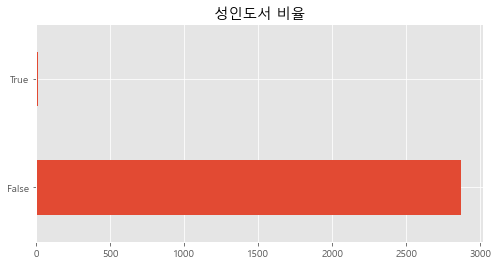

In [272]:
plt.style.use('ggplot')

df['adult'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('성인도서 비율')
plt.show()

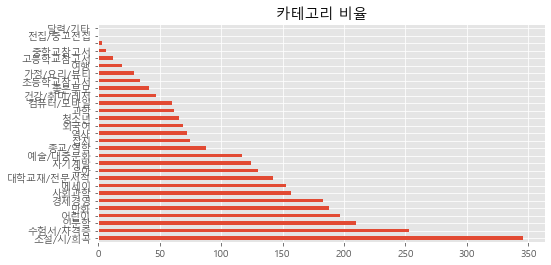

In [289]:
df1['categoryName'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('카테고리 비율')
plt.show()

In [288]:
df1['categoryName'].value_counts()

소설/시/희곡      346
수험서/자격증      253
인문학          210
어린이          197
만화           188
경제경영         183
사회과학         157
에세이          153
대학교재/전문서적    142
유아           130
자기계발         124
예술/대중문화      117
종교/역학         88
잡지            75
역사            72
외국어           69
청소년           66
과학            62
컴퓨터/모바일       60
건강/취미/레저      47
좋은부모          41
초등학교참고서       34
가정/요리/뷰티      29
여행            19
고등학교참고서       12
중학교참고서         6
               3
전집/중고전집        1
달력/기타          1
Name: categoryName, dtype: int64

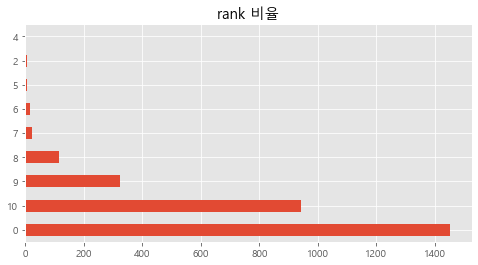

In [290]:
df1['rank'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('rank 비율')
plt.show()

# 3. 키워드 추출

In [303]:
results

'앤 서재 여성 작가 클래식 권 여자 글 쓰 혼자 여행 연애결혼 쉽 시대 제인 오스틴 그녀 예리 감각 언어 여성 사랑 결혼 마주 해야 현실 난관 치밀 그려냈'